In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rc('font', family='Malgun Gothic')
df = pd.read_excel('fitted.xlsx',encoding='utf-8')
df.head()
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 일반 검진 데이터 만들기
normal = df[df['review_cat']=='일반검진']
normal

,customer_id,profit,review_cat,judge,gender,age,insu_req_amount,insu_pay_amount,insu_duration,insu_cum_amount,...,new_bt_mchc_judge,new_bt_mvc_judge,new_bt_plat_judge,new_bt_rbc_judge,new_bt_wbc_judge,new_bt_rgpt_judge,new_bt_sgot_judge,new_bt_sgpt_judge,new_bt_trig_judge,risk
2,C112411,-313680,일반검진,재검,1,69,333680,553680,2,240000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,C112570,2022721,일반검진,재검,1,67,412210,412210,3,375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,C112727,3048120,일반검진,승인,1,65,201880,201880,26,3250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,C112730,1099094,일반검진,승인,1,65,50160,50160,12,1440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,C112742,108690,일반검진,승인,1,65,22160,266310,3,375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4471,C134107,-515322,일반검진,재검,2,55,14950,14950,11,440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4487,C134186,7610200,일반검진,승인,2,38,63700,63700,13,2860000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4488,C134188,-4993139,일반검진,승인,1,41,65610,6113139,28,1120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4492,C134250,-1757672,일반검진,승인,2,52,65200,65200,7,350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
nor = normal.dropna(axis=1)
nor.isnull().sum()

customer_id              0
profit                   0
review_cat               0
judge                    0
gender                   0
age                      0
insu_req_amount          0
insu_pay_amount          0
insu_duration            0
insu_cum_amount          0
height                   0
weight                   0
bust                     0
waist                    0
bmi                      0
whtr                     0
bp_min                   0
bp_max                   0
pulse_count              0
new_judge_score          0
new_bp_judge             0
new_pulse_count_judge    0
risk                     0
dtype: int64

In [5]:
# 데이터 구성
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 특성이 유사한 모델 선택, scaling 필요한 모델 제외
# DT, RF, GB, ANN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가 : F1 score, ROC curce, AUC
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import numpy as np

# 패키지 불러오기 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추정검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# 가설검정 및 통계 분석 패키지
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

In [6]:
# 범주형 변수 변환
nor['gender'] = nor['gender'].astype('object')
nor['new_bp_judge'] = nor['new_bp_judge'].astype('object')
nor['new_pulse_count_judge'] = nor['new_pulse_count_judge'].astype('object')
# 목표변수는 범주형 변환하면 안 된다. 이유는 모르겠지만, 모델 돌아가지 않음.

C:\Users\jykan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jykan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jykan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import graphviz

In [8]:
nor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 2 to 4493
Data columns (total 23 columns):
customer_id              985 non-null object
profit                   985 non-null int64
review_cat               985 non-null object
judge                    985 non-null object
gender                   985 non-null object
age                      985 non-null int64
insu_req_amount          985 non-null int64
insu_pay_amount          985 non-null int64
insu_duration            985 non-null int64
insu_cum_amount          985 non-null int64
height                   985 non-null int64
weight                   985 non-null int64
bust                     985 non-null int64
waist                    985 non-null int64
bmi                      985 non-null float64
whtr                     985 non-null float64
bp_min                   985 non-null int64
bp_max                   985 non-null int64
pulse_count              985 non-null int64
new_judge_score          985 non-null int64
new_bp

In [9]:
# risk와 직접적인 관련이 있는 'profit' 제외
df_end = nor.drop(['customer_id','review_cat','profit'
                  ,'insu_pay_amount','insu_cum_amount',
                  'insu_req_amount','insu_duration','judge','bp_min','bp_max',
                  'new_pulse_count_judge','new_judge_score',
                  'pulse_count'], axis=1, inplace=False)
df_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 2 to 4493
Data columns (total 10 columns):
gender          985 non-null object
age             985 non-null int64
height          985 non-null int64
weight          985 non-null int64
bust            985 non-null int64
waist           985 non-null int64
bmi             985 non-null float64
whtr            985 non-null float64
new_bp_judge    985 non-null object
risk            985 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 84.6+ KB


In [10]:
# 더미 변수 생성
pf_end = pd.get_dummies(df_end)
pf_end.head()
df_end = pf_end
df_end

,age,height,weight,bust,waist,bmi,whtr,risk,gender_1,gender_2,new_bp_judge_0,new_bp_judge_1
2,69,165,70,92,88,25.711662,0.533333,1,1,0,1,0
3,67,165,75,95,89,27.548209,0.539394,0,1,0,0,1
4,65,160,50,89,66,19.531250,0.412500,0,1,0,0,1
5,65,164,64,97,80,23.795360,0.487805,0,1,0,0,1
6,65,169,62,89,72,21.707923,0.426036,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4471,55,158,63,98,80,25.236340,0.506329,1,0,1,0,1
4487,38,161,65,94,80,25.076193,0.496894,0,0,1,1,0
4488,41,175,78,100,92,25.469388,0.525714,1,1,0,1,0
4492,52,164,60,90,66,22.308150,0.402439,1,0,1,1,0


In [11]:
df_raw_y=df_end["risk"]
df_raw_x=df_end.drop("risk", axis=1, inplace=False)

In [12]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (393, 11)
train data Y size : (393,)
validation data X size : (296, 11)
validation data Y size : (296,)
test data X size : (296, 11)
test data Y size : (296,)


In [13]:
# 모델 생성
dt_tree_uncustomized = DecisionTreeClassifier(random_state=1234)
dt_tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Accuracy on training set:{:.3f}".format(dt_tree_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(dt_tree_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.777


In [14]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidAccuracy"]=valid_accuracy

In [15]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.891,0.892
1,2,0.893,0.895
2,3,0.896,0.902
3,4,0.906,0.872
4,5,0.919,0.865
5,6,0.931,0.848
6,7,0.952,0.824
7,8,0.962,0.818
8,9,0.967,0.811
9,10,0.972,0.811


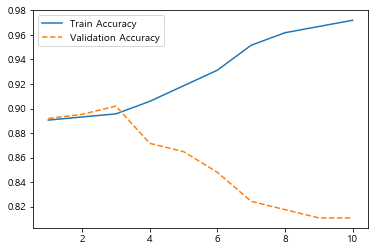

In [16]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [17]:
# 변수명 저장
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth=3,random_state=1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [18]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*2 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=valid_accuracy

In [19]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,2,0.896,0.902
1,4,0.893,0.902
2,6,0.891,0.892
3,8,0.891,0.892
4,10,0.891,0.892
5,12,0.891,0.892
6,14,0.891,0.892
7,16,0.891,0.892
8,18,0.891,0.892
9,20,0.891,0.892


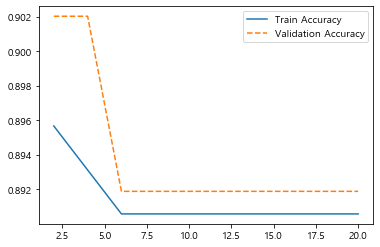

In [20]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [21]:
# 깊이가 3 모델
tree_low=DecisionTreeClassifier(max_depth=3, min_samples_split = 2, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [22]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf=[n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,min_samples_split=2,
                                max_depth=3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_depth
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidAccuracy"]=valid_accuracy

In [23]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidAccuracy
0,1,0.893,0.902
1,2,0.891,0.892
2,3,0.888,0.905
3,4,0.888,0.905
4,5,0.888,0.905
5,6,0.888,0.905
6,7,0.888,0.905
7,8,0.888,0.905
8,9,0.888,0.905
9,10,0.888,0.905


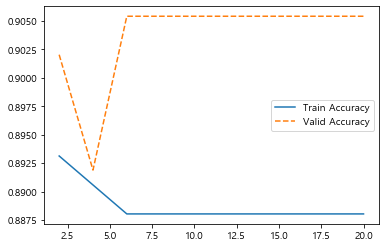

In [24]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.legend()

In [33]:
dt_tree_final=DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=2, random_state=1234)
dt_tree_final.fit(df_test_x, df_test_y)
# 평가
dt_y_pred=dt_tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(dt_tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, dt_y_pred)))

Accuracy:0.885

Confusion matrix:
[[259   0]
 [ 34   3]]


In [34]:
# 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=dt_tree_final.feature_importances_
# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
0,age,0.583
4,waist,0.245
6,whtr,0.172
1,height,0.000
2,weight,0.000
3,bust,0.000
5,bmi,0.000
7,gender_1,0.000
8,gender_2,0.000
9,new_bp_judge_0,0.000


Text(0, 0.5, '설명변수')

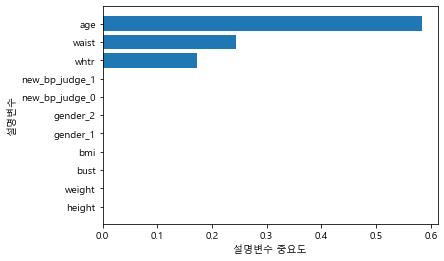

In [35]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# 랜덤 포레스트 모델 생성
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# train 데이터셋 정확도
print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(rf_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.992
Accuracy on validation set:0.885


C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# n_estimators : 트리수 변경 1~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidAccuracy"]=valid_accuracy

In [39]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValidAccuracy
0,10,0.992,0.885
1,20,0.995,0.889
2,30,1.000,0.895
3,40,1.000,0.902
4,50,1.000,0.899
5,60,1.000,0.892
6,70,1.000,0.899
7,80,1.000,0.895
8,90,1.000,0.892
9,100,1.000,0.892


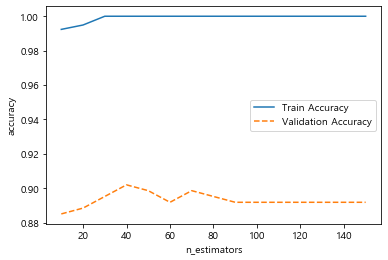

In [40]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably me

Text(0.5, 0, 'n_estimators')

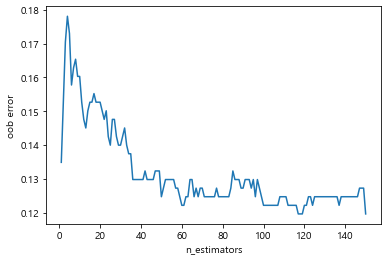

In [41]:
# error 저장 리스트
oob_error=[]
for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True,
                             random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
# 그래프로 표현
plt.plot(range(1,151),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [42]:
# 트리수 지정
n_estimators = 120

In [46]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=RandomForestClassifier(max_depth=v_max_depth,
                                n_estimators=120
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidAccuracy"]=valid_accuracy

In [47]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidAccuracy
0,1,0.888,0.905
1,2,0.888,0.905
2,3,0.888,0.905
3,4,0.893,0.905
4,5,0.898,0.902
5,6,0.924,0.902
6,7,0.944,0.899
7,8,0.959,0.899
8,9,0.975,0.899
9,10,0.995,0.895


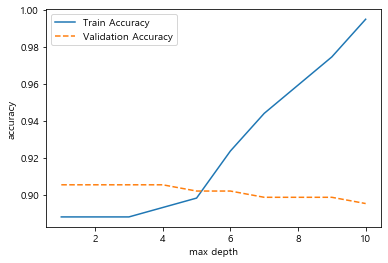

In [48]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()

In [49]:
# 최대 깊이 지정
max_depth=10

In [50]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(n_estimators=120,
                                min_samples_split=v_min_samples_split, 
                                max_depth=10, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=valid_accuracy

In [51]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,10,0.913,0.899
1,20,0.896,0.905
2,30,0.888,0.905
3,40,0.888,0.905
4,50,0.888,0.905
5,60,0.888,0.905
6,70,0.888,0.905
7,80,0.888,0.905
8,90,0.888,0.905
9,100,0.888,0.905


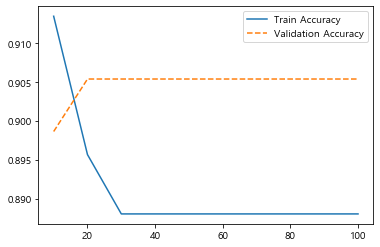

In [52]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, valid_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [53]:
# train 및 test 정확도 결과 저장
train_accuracy = []
valid_accuracy= []

# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(n_estimators=120,
                              min_samples_leaf=v_min_samples_leaf,
                              min_samples_split=20,
                                max_depth=10, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    valid_accuracy.append(tree.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_depth
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidAccuracy"]=valid_accuracy

In [54]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidAccuracy
0,1,0.888,0.905
1,2,0.888,0.905
2,3,0.888,0.905
3,4,0.888,0.905
4,5,0.888,0.905
5,6,0.888,0.905
6,7,0.888,0.905
7,8,0.888,0.905
8,9,0.888,0.905
9,10,0.888,0.905


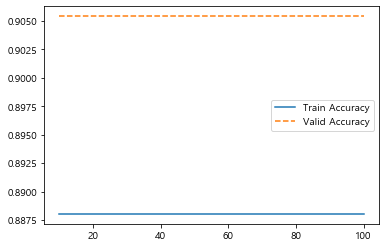

In [55]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, valid_accuracy, linestyle="--", label="Valid Accuracy")
plt.legend()

In [66]:
rf_tree_final=RandomForestClassifier(n_estimators=120, max_depth=10, min_samples_split=20, 
                                     min_samples_leaf=1, random_state=1234)
rf_tree_final.fit(df_test_x, df_test_y)
# 평가
rf_y_pred=rf_tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, rf_y_pred)))

Accuracy:0.878

Confusion matrix:
[[259   0]
 [ 36   1]]


In [69]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator=RandomForestClassifier(n_estimators=120,random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid={"max_depth":para_depth, "min_samples_leaf":para_leaf,
            'min_samples_split':para_split}
# 정확도가 높은 최적 parameter 찾기
grid_rf=GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

C:\Users\jykan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter:
{'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score:
0.888


In [70]:
rf_tree_final=RandomForestClassifier(n_estimators=120, max_depth=10, min_samples_split=10, 
                                     min_samples_leaf=1, random_state=1234)
rf_tree_final.fit(df_test_x, df_test_y)
# 평가
rf_y_pred=rf_tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, rf_y_pred)))

Accuracy:0.889

Confusion matrix:
[[259   0]
 [ 33   4]]


In [71]:
# 변수명
v_feature_name=df_train_x.columns
# 설명변수 중요도 확인 및 테이블 저장
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_tree_final.feature_importances_
# 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,whtr,0.178
5,bmi,0.159
0,age,0.144
4,waist,0.134
1,height,0.116
2,weight,0.113
3,bust,0.104
10,new_bp_judge_1,0.014
8,gender_2,0.014
9,new_bp_judge_0,0.014


In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터셋 정확도
print("Accuracy on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Validation 데이터 설명력
print("Accuracy on validation set:{:.3f}".format(gb_uncustomized.score(df_val_x, df_val_y)))

Accuracy on training set:0.969
Accuracy on validation set:0.885


In [74]:
# train / test 정확도 결과 저장
train_accuracy=[]
val_accuracy=[]
# learning rate 변경 : 0.1~0.9
para_lr=[lr*0.05 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate, 
                                 random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))
# 테이블로 저장
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr["LearningRate"]=para_lr
df_accuracy_lr["TrainAccuracy"]=train_accuracy
df_accuracy_lr["ValidationAccuracy"]=val_accuracy

In [75]:
# learning rate 별 정확도 테이블
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,ValidationAccuracy
0,0.05,0.939,0.895
1,0.10,0.969,0.885
2,0.15,0.992,0.872
3,0.20,0.995,0.875
4,0.25,1.000,0.889
5,0.30,1.000,0.868
6,0.35,1.000,0.861
7,0.40,1.000,0.865
8,0.45,1.000,0.868


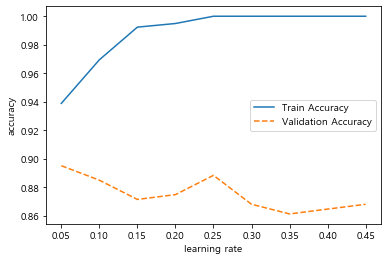

In [76]:
# Learning rate별 정확도 그래프로 확인
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [77]:
# train / test 정확도 결과 저장
train_accuracy=[]
val_accuracy=[]
# n_estimators : 트리수 변경 10~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators=v_n_estimators,
                                  learning_rate=0.25,
                                 random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))
# 테이블로 저장
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidationAccuracy"]=val_accuracy

In [78]:
# n_estimators별 정확도
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,ValidationAccuracy
0,10,0.921,0.885
1,20,0.936,0.885
2,30,0.959,0.895
3,40,0.969,0.889
4,50,0.985,0.889
5,60,0.987,0.889
6,70,0.995,0.892
7,80,0.995,0.885
8,90,0.997,0.885
9,100,1.000,0.889


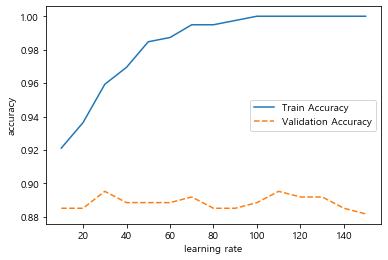

In [79]:
# Learning rate별 정확도 그래프로 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [80]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# max_depth : 최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth=v_max_depth,
                                n_estimators=110,
                                learning_rate=0.25,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidationAccuracy"]=val_accuracy

In [81]:
# max_depth별 정확도 테이블
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidationAccuracy
0,1,0.898,0.902
1,2,0.980,0.892
2,3,1.000,0.895
3,4,1.000,0.861
4,5,1.000,0.855
5,6,1.000,0.861
6,7,1.000,0.868
7,8,1.000,0.868
8,9,1.000,0.861
9,10,1.000,0.807


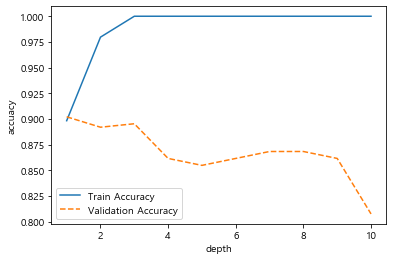

In [82]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("depth")
plt.legend()

In [83]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split=[n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(min_samples_split=v_min_samples_split
                                  ,max_depth=3,
                                n_estimators=110,
                                learning_rate=0.25,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidationAccuracy"]=val_accuracy

In [84]:
# min_samples_split 정확도 테이블
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,20,1.000,0.868
1,30,0.997,0.861
2,40,0.997,0.872
3,50,0.995,0.861
4,60,0.992,0.875
5,70,0.992,0.868
6,80,0.995,0.878
7,90,0.990,0.875
8,100,0.987,0.875


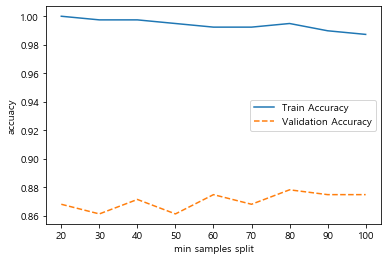

In [85]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("min samples split")
plt.legend()

In [86]:
# train 및 test 정확도 결과 저장
train_accuracy = []
val_accuracy= []

# min_samples_leaf :잎사귀 노드 최소 자료수 제한
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf
        ,min_samples_split=80
                                  ,max_depth=3,
                                n_estimators=110,
                                learning_rate=0.25,
                                random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    val_accuracy.append(gb.score(df_val_x, df_val_y))

# 결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["ValidationAccuracy"]=val_accuracy

In [87]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,10,0.990,0.882
1,20,0.975,0.905
2,30,0.959,0.889
3,40,0.957,0.892
4,50,0.941,0.885
5,60,0.926,0.899
6,70,0.913,0.902
7,80,0.906,0.895
8,90,0.891,0.902
9,100,0.893,0.905


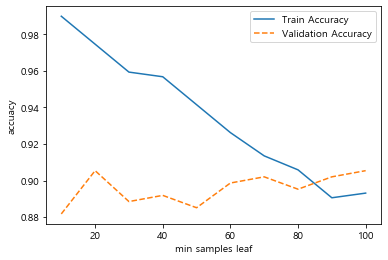

In [88]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuacy")
plt.xlabel("min samples leaf")
plt.legend()

In [100]:
# 최종 모델
gb_final=GradientBoostingClassifier(min_samples_leaf=10,
                                    min_samples_split=80,
                                   max_depth=3,
                                   n_estimators=10,
                                   learning_rate=0.25,
                                   random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# 예측
gb_y_pred=gb_final.predict(df_test_x)

# Train 데이터 정확도 / Test 데이터 정확도
print("Accuracy on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on Test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, gb_y_pred)))

Accuracy on training set:0.896
Accuracy on Test set:0.868
Confusion matrix:
[[257   2]
 [ 37   0]]
